# NOTEBOOK PREDICT

In [1]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
# from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier

In [53]:
data = pd.read_csv('datadf.csv')
data

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0,2017,0,3,34,1,0,0,0
1,1,0,2013,2,1,28,0,0,3,1
2,2,0,2014,1,3,38,0,0,2,0
3,3,1,2016,0,3,27,1,0,5,1
4,4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,4648,0,2013,0,3,26,0,0,4,0
4649,4649,1,2013,2,2,37,1,0,2,1
4650,4650,1,2018,1,3,27,1,0,5,1
4651,4651,0,2012,0,3,30,1,1,2,0


In [50]:
data = pd.read_csv('datadf.csv')
data

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0,2017,0,3,34,1,0,0,0
1,1,0,2013,2,1,28,0,0,3,1
2,2,0,2014,1,3,38,0,0,2,0
3,3,1,2016,0,3,27,1,0,5,1
4,4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,4648,0,2013,0,3,26,0,0,4,0
4649,4649,1,2013,2,2,37,1,0,2,1
4650,4650,1,2018,1,3,27,1,0,5,1
4651,4651,0,2012,0,3,30,1,1,2,0


In [30]:
X = data.drop(["LeaveOrNot"], axis=1)
y = data.LeaveOrNot

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [32]:
X_train.shape

(3722, 9)

In [33]:
y_train.shape

(3722,)

In [34]:
preprocessing_StandardScaler = Pipeline(steps=[
    ("standardscaler", StandardScaler())])

# 3eme Iteration KNeighborsClassifier

In [54]:
KNC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                               ["classifier", KNeighborsClassifier()]])

In [55]:
KNC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [56]:
print("accuracy train : %.3f"%KNC.score(X_train , y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.858
accuracy test : 0.824


In [57]:
y_pred_KNC = KNC.predict(X_test) 

In [58]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       610
           1       0.83      0.61      0.71       321

    accuracy                           0.82       931
   macro avg       0.83      0.77      0.79       931
weighted avg       0.83      0.82      0.82       931



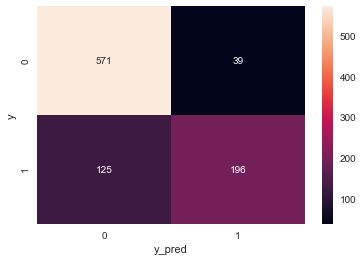

In [59]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

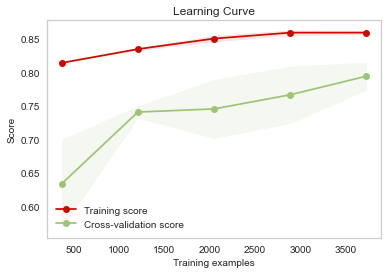

In [60]:
plot_learning_curve(KNC, X, y)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

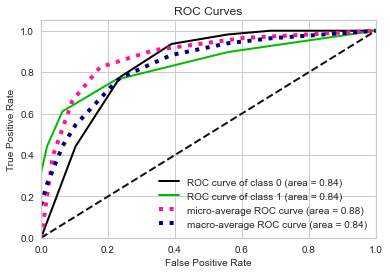

In [61]:
KNC.fit(X_train, y_train)
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [62]:
import pickle

In [63]:
with open('model_pkl.pickle.pkl', 'wb') as f:
    pickle.dump(KNC, f)

In [64]:
# with open('testing_pickle' , "rb") as f:
#      mp=pickle.load(f)

In [65]:
KNC.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,